In [ ]:
# Lens distortion testing and then undistorting
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html
# The second mtx in the undistort function can be used to change the centre and direction of the camera 
# if it is not mounted centrally
# roi can be used to select the good part of the image, but sometimes it returns 0

In [ ]:
# Results:

# For Tim's Turnigy action camera
mtx, dist = numpy.array([[690.39321933, 0, 634.37817589], [ 0, 702.14519838, 365.87529244], [ 0, 0, 1]]), numpy.array([[-0.32184539, 0.13264522, -0.00105117, 0.00286794, -0.02831195]])

# For Julian's S9 phone
mtx, dist = numpy.array([[1.83493191e+03, 0.00000000e+00, 9.71559848e+02], [0.00000000e+00, 1.88918446e+03, 5.07887225e+02], [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), numpy.array([[ 0.27965266, -1.79449969, -0.01245634, 0.00592566, 3.64338597]])
# (after undistortion applied)
mtx, dist = numpy.array([[1.78052142e+03, 0.00000000e+00, 9.59332429e+02], [0.00000000e+00, 1.87243955e+03, 6.19163722e+02], [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), numpy.array([[-0.01420634, 0.2012354 , 0.00146844, -0.00239301, -0.6048644 ]])

# For Julian's Hero4 gopro
mtx, dist = numpy.array([[566.7163809, 0, 632.00137913], [ 0, 579.06244697, 485.92119094], [ 0, 0, 1]]), numpy.array([[-0.25674316, 0.08553107, -0.00286892, -0.00258803, -0.01426477]])
# (after undistortion applied)
mtx, dist = numpy.array([[583.01244776, 0, 631.10556735], [ 0, 588.32076401, 466.18157148], [ 0, 0, 1]]), numpy.array([[-0.02103092, 0.03318768, 0.00058936, 0.00011377, -0.01643113]])

# For Julian's Hero2 gopro not in its case
mtx, dist = numpy.array([[572.01802557, 0, 665.06249431], [ 0, 573.93668738, 367.45231427], [ 0, 0, 1]]), numpy.array([[-0.31193177, 0.13605342, 0.00348668, -0.00163797, -0.03588084]])

# For Julian's Hero2 gopro in its case
mtx, dist = numpy.array([[623.28986211, 0, 677.34961678], [ 0, 625.97496435, 383.90205928], [ 0, 0, 1]]), numpy.array([[-0.30269614, 0.12895977, 0.00115432, -0.00402918, -0.01630073]])


In [110]:
import cv2, numpy

vfile = "/home/julian/repositories/Future-Hangglider/CameraCalibrationTech/videos/turnigy60fps_chessboard.MOV"
vfile = "/home/julian/repositories/Future-Hangglider/CameraCalibrationTech/videos/JulianS9_chessboard.mp4"
vfile = "/home/julian/repositories/Future-Hangglider/CameraCalibrationTech/videos/Hero4_chessboard.MP4"
vfile = "/home/julian/repositories/Future-Hangglider/CameraCalibrationTech/videos/Hero2_nocase.MP4"
vfile = "/home/julian/repositories/Future-Hangglider/CameraCalibrationTech/videos/Hero2_incase.MP4"

cap = cv2.VideoCapture(vfile)


In [111]:

pattern_size = (6, 9)
square_size = float(1.0)
pattern_points = numpy.zeros((numpy.prod(pattern_size), 3), numpy.float32)
pattern_points[:,:2] = numpy.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= square_size

obj_points = []
img_points = []



In [112]:
nframes = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
h, w = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print("nframes", nframes, "h,w =", h, w)

nframes 1080 h,w = 720 1280


In [113]:
for iframe in range(10, nframes, nframes//44):
    cap.set(cv2.CAP_PROP_POS_FRAMES, iframe)
    flag, frame = cap.retrieve()

    # try undistorting and then doing chessboards to see what undistorted distortion value comes as
    #mtx, dist = numpy.array([[566.7163809, 0, 632.00137913], [ 0, 579.06244697, 485.92119094], [ 0, 0, 1]]), numpy.array([[-0.25674316, 0.08553107, -0.00286892, -0.00258803, -0.01426477]])
    #frame = cv2.undistort(frame, mtx, dist, None, mtx)
    
    cv2.waitKey(10)  # necessary for the cv2.imshow() to work
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print("frame: ", iframe)
    found, corners = cv2.findChessboardCorners(img, pattern_size)
    if found:
        cv2.drawChessboardCorners(frame, pattern_size, corners, found) 
        #sml = cv2.resize(frame, (w//2,h//2))
        cv2.imshow('video', frame)
        term = ( cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1 )
        cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)
        img_points.append(corners.reshape(-1, 2))
        obj_points.append(pattern_points)

    else:
        print('chessboard not found')

cv2.destroyAllWindows()
len(frames)

chessboard not found
chessboard not found
chessboard not found


47

In [114]:
# this can take a long time (sometimes)
#cv2.fisheye.calibrate(objpoints, imgpoints, (w, h), None, None)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h), None, None)
mtx, dist

(array([[623.28986211,   0.        , 677.34961678],
        [  0.        , 625.97496435, 383.90205928],
        [  0.        ,   0.        ,   1.        ]]),
 array([[-0.30269614,  0.12895977,  0.00115432, -0.00402918, -0.01630073]]))

In [115]:
mtxt = "mtx, dist = numpy.%s, numpy.%s" % (repr(mtx), repr(dist))
mtxt = " ".join(mtxt.split())
mtxt = mtxt.replace(". ", "")
print(mtxt)

mtx, dist = numpy.array([[623.28986211, 0, 677.34961678], [ 0, 625.97496435, 383.90205928], [ 0, 0, 1]]), numpy.array([[-0.30269614, 0.12895977, 0.00115432, -0.00402918, -0.01630073]])


In [14]:
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 0, (w,h))
print(roi, newcameramtx)
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
#x,y,lw,lh = roi
#plt.imshow(cv2.cvtColor(dst[y:y+lh, x:x+lw], cv2.COLOR_BGR2RGB))


(0, 0, 0, 0) [[-628.55316162    0.         -551.76430092]
 [   0.         -525.34655762 -203.15422469]
 [   0.            0.            1.        ]]


[10, 226, 442, 658, 874]


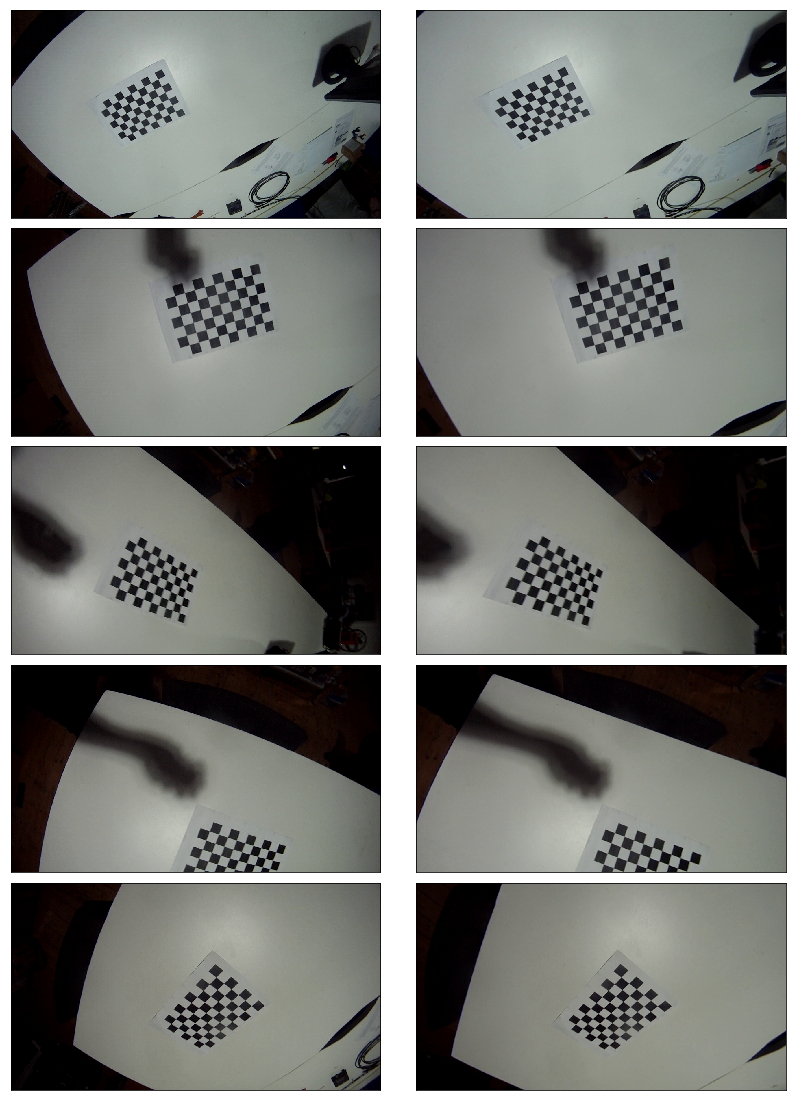

In [116]:
from matplotlib import pyplot as plt
%matplotlib inline

mtx, dist = numpy.array([[690.39321933, 0, 634.37817589], [ 0, 702.14519838, 365.87529244], [ 0, 0, 1]]), numpy.array([[-0.32184539, 0.13264522, -0.00105117, 0.00286794, -0.02831195]])
mtx, dist = numpy.array([[1.83493191e+03, 0.00000000e+00, 9.71559848e+02], [0.00000000e+00, 1.88918446e+03, 5.07887225e+02], [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), numpy.array([[ 0.27965266, -1.79449969, -0.01245634, 0.00592566, 3.64338597]])
mtx, dist = numpy.array([[566.7163809 , 0, 632.00137913], [ 0, 579.06244697, 485.92119094], [ 0, 0, 1]]), numpy.array([[-0.25674316, 0.08553107, -0.00286892, -0.00258803, -0.01426477]])
mtx, dist = numpy.array([[572.01802557, 0, 665.06249431], [ 0, 573.93668738, 367.45231427], [ 0, 0, 1]]), numpy.array([[-0.31193177, 0.13605342, 0.00348668, -0.00163797, -0.03588084]])
mtx, dist = numpy.array([[623.28986211, 0, 677.34961678], [ 0, 625.97496435, 383.90205928], [ 0, 0, 1]]), numpy.array([[-0.30269614, 0.12895977, 0.00115432, -0.00402918, -0.01630073]])

h, w = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, mtx, (w,h), 5)

plt.figure(figsize=(11,15))
framenumbers = list(range(10, nframes, nframes//5))
print(framenumbers)
for i in range(len(framenumbers)):
    iframe = framenumbers[i]
    cap.set(cv2.CAP_PROP_POS_FRAMES, iframe)
    flag, frame = cap.retrieve()
    frame_undistorted = cv2.undistort(frame, mtx, dist, None, mtx)
    frame_rectified = cv2.remap(frame_undistorted, mapx, mapy, cv2.INTER_LINEAR)
    
    plt.subplot(len(framenumbers), 2, i*2+1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.subplot(len(framenumbers), 2, i*2+2)
    plt.imshow(cv2.cvtColor(frame_undistorted, cv2.COLOR_BGR2RGB))
    #plt.imshow(cv2.cvtColor(frame_rectified, cv2.COLOR_BGR2RGB))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    
plt.subplots_adjust(0,0,1,1,0.05,0.05)
#plt.savefig("ch.jpg")

In [80]:
cap.read()

(False, None)

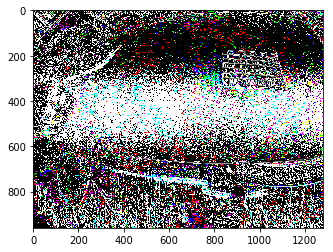

In [81]:
# try to prove if every other frame is identical on 60fps setting
cap.set(cv2.CAP_PROP_POS_FRAMES, 500)
f1 = cap.read()[1]
f2 = cap.read()[1]
f3 = cap.read()[1]
f4 = cap.read()[1]
plt.imshow(f2-f3)

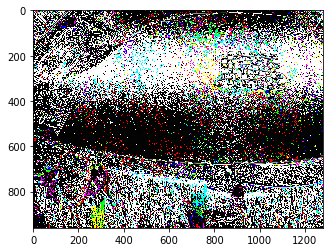

In [83]:
plt.imshow(f1-f2)

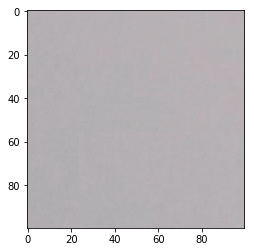

In [82]:
plt.imshow(f1[200:300,600:700,:])
plt.imshow(f2[200:300,600:700,:])

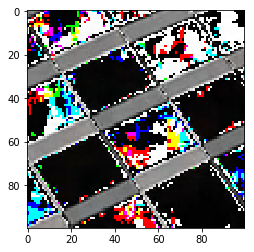

In [64]:
plt.imshow(f1[200:300,600:700,:]-f4[200:300,600:700,:])